In [38]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import pandas as pd
df = pd.read_csv('alturas-pesos-train.csv')

# Cual es la estimación de la probabilidad de que pese 65 y mida 165?

In [43]:
# contamos todas las personas que pesan 65kg y miden 165cm
frec_65_165 = ((df['Peso'] == 65) & (df['Altura'] == 165)).sum()
print(frec_65_165)

402


In [44]:
P_peso_65_alt_165 = frec_65_165/len(df)
print(P_peso_65_alt_165)

0.05025


Formalmente, si $X_1$ es el peso y $X_2$ es la altura

$P(X_1 = 65, X_2 = 165) = 0.05025 $

# Estimación de la conjunta

In [45]:
df[['Peso', 'Altura']].values

array([[ 60, 160],
       [ 95, 180],
       [ 75, 170],
       ...,
       [ 75, 170],
       [ 65, 165],
       [ 80, 170]])

In [46]:
tuplas = []
for line in df[['Peso', 'Altura']].values:
    tuplas.append(tuple(line))

In [49]:
#print(tuplas)

In [50]:
from collections import Counter
Counter(tuplas).most_common(20)

[((60, 160), 453),
 ((85, 175), 408),
 ((65, 165), 402),
 ((75, 170), 394),
 ((80, 170), 369),
 ((80, 175), 351),
 ((70, 165), 337),
 ((90, 180), 335),
 ((65, 160), 305),
 ((55, 155), 302),
 ((70, 170), 279),
 ((55, 160), 272),
 ((90, 175), 262),
 ((85, 180), 239),
 ((60, 165), 235),
 ((75, 165), 209),
 ((50, 155), 208),
 ((95, 180), 201),
 ((60, 155), 179),
 ((85, 170), 176)]

In [51]:
frecuencia_conjunta = dict(Counter(tuplas))
frecuencia_conjunta

{(60, 160): 453,
 (95, 180): 201,
 (75, 170): 394,
 (55, 160): 272,
 (55, 150): 59,
 (80, 175): 351,
 (70, 170): 279,
 (55, 155): 302,
 (85, 180): 239,
 (60, 165): 235,
 (80, 165): 98,
 (95, 185): 153,
 (75, 165): 209,
 (65, 170): 128,
 (65, 160): 305,
 (40, 150): 16,
 (40, 145): 22,
 (70, 160): 108,
 (65, 165): 402,
 (85, 170): 176,
 (85, 165): 23,
 (50, 155): 208,
 (90, 175): 262,
 (30, 145): 1,
 (45, 150): 93,
 (60, 155): 179,
 (90, 170): 36,
 (90, 180): 335,
 (110, 195): 11,
 (85, 185): 30,
 (65, 155): 55,
 (85, 175): 408,
 (70, 165): 337,
 (60, 170): 31,
 (60, 150): 16,
 (90, 190): 5,
 (100, 185): 97,
 (45, 155): 46,
 (50, 150): 133,
 (105, 185): 18,
 (80, 170): 369,
 (35, 145): 3,
 (95, 175): 58,
 (50, 160): 60,
 (75, 175): 134,
 (100, 190): 48,
 (75, 160): 42,
 (55, 165): 69,
 (95, 190): 38,
 (70, 175): 44,
 (55, 145): 4,
 (90, 185): 119,
 (105, 195): 13,
 (50, 145): 16,
 (100, 175): 9,
 (80, 180): 63,
 (100, 180): 33,
 (45, 145): 33,
 (110, 190): 8,
 (115, 200): 2,
 (45, 160): 

## Espacio muestral

In [52]:
frecuencia_conjunta.keys()

dict_keys([(60, 160), (95, 180), (75, 170), (55, 160), (55, 150), (80, 175), (70, 170), (55, 155), (85, 180), (60, 165), (80, 165), (95, 185), (75, 165), (65, 170), (65, 160), (40, 150), (40, 145), (70, 160), (65, 165), (85, 170), (85, 165), (50, 155), (90, 175), (30, 145), (45, 150), (60, 155), (90, 170), (90, 180), (110, 195), (85, 185), (65, 155), (85, 175), (70, 165), (60, 170), (60, 150), (90, 190), (100, 185), (45, 155), (50, 150), (105, 185), (80, 170), (35, 145), (95, 175), (50, 160), (75, 175), (100, 190), (75, 160), (55, 165), (95, 190), (70, 175), (55, 145), (90, 185), (105, 195), (50, 145), (100, 175), (80, 180), (100, 180), (45, 145), (110, 190), (115, 200), (45, 160), (105, 190), (65, 175), (70, 155), (40, 140), (30, 140), (100, 195), (115, 195), (75, 180), (40, 160), (65, 150), (55, 170), (80, 185), (80, 160), (50, 165), (40, 155), (35, 140), (85, 160), (105, 200), (45, 140), (35, 155), (120, 200), (105, 180), (95, 195), (110, 200), (115, 190), (70, 180), (75, 155)])

# Probabilidad Conjunta

In [53]:
conjunta_prob = {al:c/len(df) for al, c in frecuencia_conjunta.items()}

In [54]:
# Primer verificicación de que hicimos las cosas bien
sum(conjunta_prob.values())

1.0

In [59]:
print(conjunta_prob)

{(60, 160): 0.056625, (95, 180): 0.025125, (75, 170): 0.04925, (55, 160): 0.034, (55, 150): 0.007375, (80, 175): 0.043875, (70, 170): 0.034875, (55, 155): 0.03775, (85, 180): 0.029875, (60, 165): 0.029375, (80, 165): 0.01225, (95, 185): 0.019125, (75, 165): 0.026125, (65, 170): 0.016, (65, 160): 0.038125, (40, 150): 0.002, (40, 145): 0.00275, (70, 160): 0.0135, (65, 165): 0.05025, (85, 170): 0.022, (85, 165): 0.002875, (50, 155): 0.026, (90, 175): 0.03275, (30, 145): 0.000125, (45, 150): 0.011625, (60, 155): 0.022375, (90, 170): 0.0045, (90, 180): 0.041875, (110, 195): 0.001375, (85, 185): 0.00375, (65, 155): 0.006875, (85, 175): 0.051, (70, 165): 0.042125, (60, 170): 0.003875, (60, 150): 0.002, (90, 190): 0.000625, (100, 185): 0.012125, (45, 155): 0.00575, (50, 150): 0.016625, (105, 185): 0.00225, (80, 170): 0.046125, (35, 145): 0.000375, (95, 175): 0.00725, (50, 160): 0.0075, (75, 175): 0.01675, (100, 190): 0.006, (75, 160): 0.00525, (55, 165): 0.008625, (95, 190): 0.00475, (70, 175)

# Graficamos

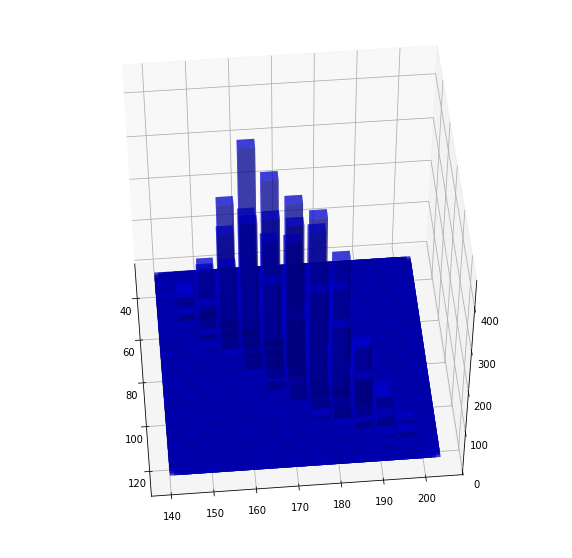

In [60]:
from helper import plot_joint_3d
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(frecuencia_conjunta, bins_width = 4, az=50, el=-5, ax=ax)

# Marginales y conjunta

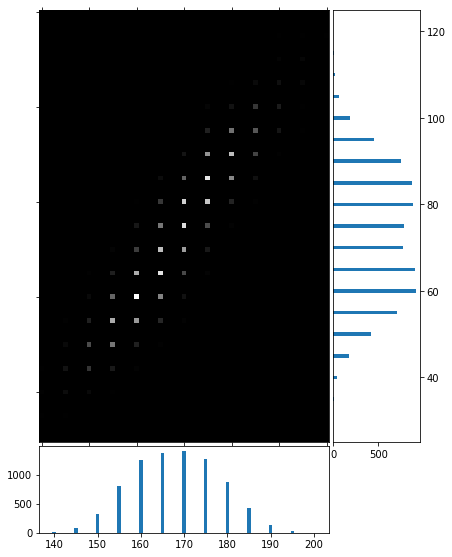

In [19]:
from helper import plot_joint_hists_dicts
conjunta_np, p_min, a_min = plot_joint_hists_dicts(frecuencia_conjunta)

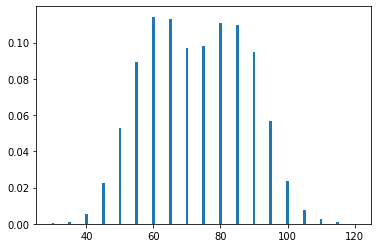

In [20]:
peso =  df['Peso']
peso_frecuencia = dict(Counter(peso))
peso_prob = {pe:c/len(peso) for pe, c in peso_frecuencia.items()}
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

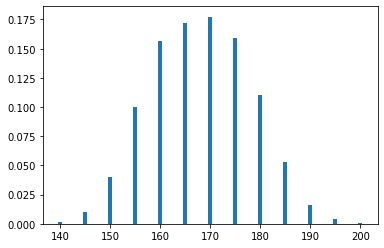

In [21]:
altura =  df['Altura']
altura_frecuencia = dict(Counter(altura))
altura_prob = {al:c/len(altura) for al, c in altura_frecuencia.items()}
plt.bar(altura_prob.keys(), altura_prob.values())
plt.show()

In [22]:
peso_gen = np.random.choice(list(peso_prob.keys()), size = 10000, p = list(peso_prob.values()))
print(peso_gen[:100])

[ 80  45  70  75  75  75  50  95  90  85  60  75  60  80  60  85  70  75
  85  65  75  85  85  85  80  80  55  65  50  80  60  90  80  80  65  70
  85  85  80 115  85  60  65  45  85  90  70 100  95  60  80  60  95  95
  55  90  70  80  55  55  60  70  60  60  70  70  85  95  80  80  90  70
  70  75  65  70  60  50  65  90  50  60  65  55  85  70  85  95  95  80
  65  90  65  35  60  65  45  85  65  50]


In [23]:
alt_gen = np.random.choice(list(altura_prob.keys()), size = 10000, p = list(altura_prob.values()))
print(alt_gen[:100])

[165 185 160 180 160 155 170 180 155 170 170 155 150 180 165 160 175 180
 175 175 175 160 165 165 170 170 170 160 170 175 170 175 170 160 155 170
 170 175 165 155 170 155 175 165 170 155 175 175 170 150 170 160 185 170
 180 155 165 165 185 160 170 170 160 165 170 180 150 155 155 155 165 165
 170 175 185 160 175 175 160 160 160 175 165 175 175 175 175 165 170 185
 165 165 175 170 180 170 160 160 180 180]


In [24]:
gen_from_marg = [(peso_gen[i], alt_gen[i]) for i in range(len(alt_gen))]

In [25]:
frec_gen_from_marg = dict(Counter(gen_from_marg))

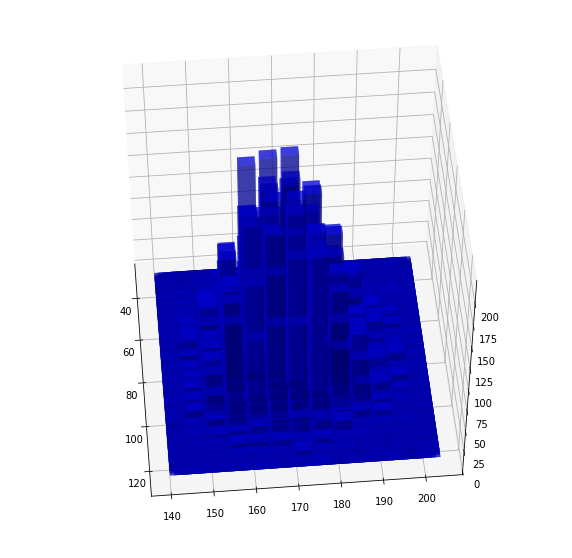

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(frec_gen_from_marg, bins_width = 4, az=50, el=-5, ax=ax)

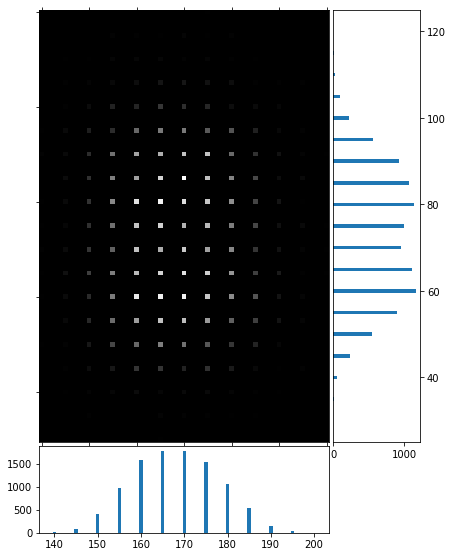

In [27]:
conjunta_np, p_min, a_min = plot_joint_hists_dicts(frec_gen_from_marg)

# Como podríamos generar?

In [28]:
items = list(conjunta_prob.items())
print(items)

[((60, 160), 0.056625), ((95, 180), 0.025125), ((75, 170), 0.04925), ((55, 160), 0.034), ((55, 150), 0.007375), ((80, 175), 0.043875), ((70, 170), 0.034875), ((55, 155), 0.03775), ((85, 180), 0.029875), ((60, 165), 0.029375), ((80, 165), 0.01225), ((95, 185), 0.019125), ((75, 165), 0.026125), ((65, 170), 0.016), ((65, 160), 0.038125), ((40, 150), 0.002), ((40, 145), 0.00275), ((70, 160), 0.0135), ((65, 165), 0.05025), ((85, 170), 0.022), ((85, 165), 0.002875), ((50, 155), 0.026), ((90, 175), 0.03275), ((30, 145), 0.000125), ((45, 150), 0.011625), ((60, 155), 0.022375), ((90, 170), 0.0045), ((90, 180), 0.041875), ((110, 195), 0.001375), ((85, 185), 0.00375), ((65, 155), 0.006875), ((85, 175), 0.051), ((70, 165), 0.042125), ((60, 170), 0.003875), ((60, 150), 0.002), ((90, 190), 0.000625), ((100, 185), 0.012125), ((45, 155), 0.00575), ((50, 150), 0.016625), ((105, 185), 0.00225), ((80, 170), 0.046125), ((35, 145), 0.000375), ((95, 175), 0.00725), ((50, 160), 0.0075), ((75, 175), 0.01675),

In [30]:
len(items)

88

In [32]:
import numpy as np

In [33]:
data_indexes = np.random.choice(88, size = 10000, p = [x[1] for x in items])

In [34]:
generates_data = []
for i in data_indexes:
    generates_data.append(items[i][0])

In [35]:
gen_frec = dict(Counter(generates_data))

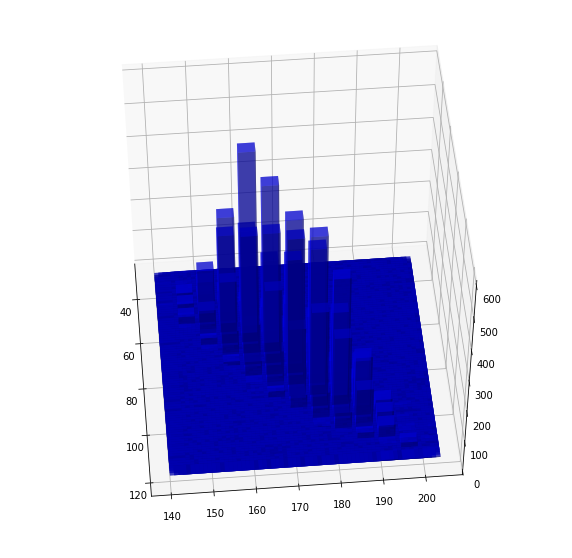

In [36]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(gen_frec, bins_width = 4, az=50, el=-5, ax=ax)

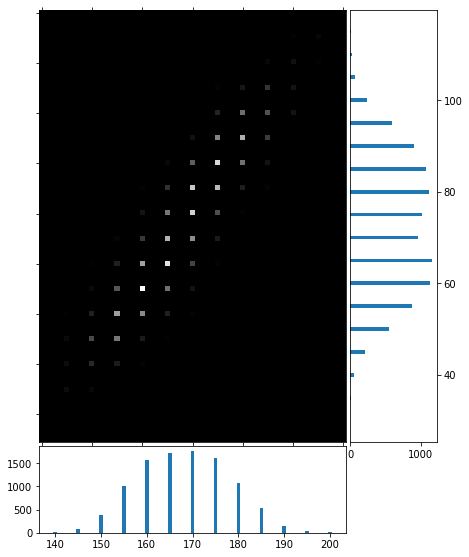

In [37]:
from helper import plot_joint_hists_dicts
conjunta_np, p_min, a_min = plot_joint_hists_dicts(gen_frec)